Regresión Logística para predecir si un paciente tiene cancer de seno o no

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Importar el dataset breast_cancer de la ibrería scikit-learn

In [ ]:
dataset = datasets.load_breast_cancer()
print(dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

La informacion que contiene el dataset: data(datos independientes), target (respuestas), target_names (nombres de las variables del target), DESCR y features_names (nombres de cada columna de datos).

In [ ]:
print(dataset.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [ ]:
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

Definiendo las variables X, y donde: X = "data", y = "target".

In [ ]:
X = dataset.data
y = dataset.target

Separando los datos de prueba y entrenamiento.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Las caracteristicas son diferentes en magnitudes, unidades y rango por lo tanto, se utiliza el método StandarScaler para llevarlos a un mismo nivel de magnitudes.

In [ ]:
from sklearn.preprocessing import StandardScaler
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)    #realiza el calculo correspondiente al mismo tiempo que transforma, devolviendo datos escalados
X_test = escalar.transform(X_test)

El modelo de Regresión Logística

In [ ]:
RegresionLog = LogisticRegression(max_iter=700)
#Entrenamiento del modelo
RegresionLog.fit(X_train, y_train)
#Prediccion
y_pred = RegresionLog.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1])

Verificando la eficacia del modelo a través de la Matriz de confusión.

In [ ]:
#En cuanto a los datos reales y los predichos
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[39  3]
 [ 1 71]]


Graficando la Matriz

Text(33.0, 0.5, 'Etiqueta actual')

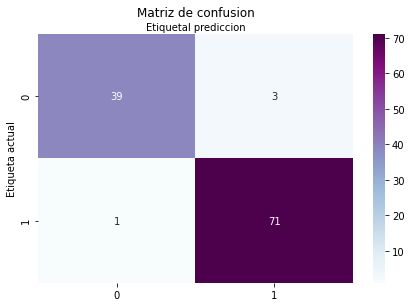

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
nombre_clases = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(nombre_clases))
plt.xticks(tick_marks, nombre_clases)
plt.yticks(tick_marks, nombre_clases)

sns.heatmap(pd.DataFrame(matriz), annot=True, cmap='BuPu', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusion', y=1.1)
plt.xlabel('Etiquetal prediccion')
plt.ylabel('Etiqueta actual')


*   Verdadero Positivo: 39 datos eran 1 y fueron predichos correctamente como positivos.
*   Verdadero Negativo: 71 eran 0 y fueron predichos correctamente como negativos.
*   Falso Positivo: 1 dato era 0 y fue predicho como 1.
*   Falso Negativo: 3 datos eran 1 y fueron predichos como 0.









La precisión del modelo

In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.9594594594594594


La exactitud del modelo

In [ ]:
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.9649122807017544


La sensibilidad del modelo

In [ ]:
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred)
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.9861111111111112


El puntaje F1 que es una combinación entre la precisión y la sensibilidad

In [ ]:
from sklearn.metrics import f1_score
puntajef1 = f1_score(y_test, y_pred)
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.9726027397260274
